In [1]:
import copy
import sqlite3

import numpy as np
import pandas as pd

from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole

In [2]:
def call_my_query(db_file, my_query):
    ## connect to the SQLIte database
    my_connection = sqlite3.connect(db_file)

    ## create a cursor object
    my_cursor = my_connection.cursor()

    ## excute the query
    my_cursor.execute(my_query)

    ## fetch all the rows
    rows = my_cursor.fetchall()
    
    ## export the results
    data_list = [row for row in rows]

    my_connection.close()
    return data_list

def extract_tables(db_file, table_name):
    ## extract table data from SQLite DB
    my_query_colName = f"PRAGMA table_info({table_name})"
    colName_list = call_my_query(db_file, my_query_colName)

    my_query_data = f"SELECT * FROM {table_name}"
    data_list = call_my_query(db_file, my_query_data)

    ## clean up data
    dataDict = {}
    for row_tuple in data_list:
        idx = row_tuple[0]
        dataDict[idx] = {}

        for col in colName_list:
            colIdx, colName = col[0], col[1]
            dataDict[idx][colName] = row_tuple[colIdx]
    return dataDict


###########################################################################3
db_file_frag = './results/Compounds_All.fragdb'
dataDict_tables_frag = {}

for table_name in ["fragmentation", "record"]:
    dataDict_table = extract_tables(db_file_frag, table_name)
    dataDict_tables_frag[table_name] = pd.DataFrame.from_dict(dataDict_table).T
    # print(table_name)

###########################################################################
db_file_mmps = './results/Compounds_All.mmpdb'
dataDict_tables_mmps = {}

for table_name in ["pair", "compound", "compound_property", "property_name", "constant_smiles",
                   "rule", "rule_smiles", "rule_environment", "rule_environment_statistics", "environment_fingerprint"]:
    dataDict_table = extract_tables(db_file_mmps, table_name)
    dataDict_tables_mmps[table_name] = pd.DataFrame.from_dict(dataDict_table).T
    # print(table_name)

In [3]:
table_frag = pd.merge(left=dataDict_tables_frag["record"], right=dataDict_tables_frag["fragmentation"], left_on='id', right_on='record_id', how='left')
table_frag.head(3)

,id_x,title,input_smiles,num_normalized_heavies,normalized_smiles,id_y,record_id,num_cuts,enumeration_label,variable_num_heavies,variable_symmetry_class,variable_smiles,attachment_order,constant_num_heavies,constant_symmetry_class,constant_smiles,constant_with_H_smiles
0,1,KT-0032100,N1(CCSCC1)c3ccn2ncc(c2n3)C(=O)Nc4c(nn(c4)[C@H]...,62,Cn1c(=O)n(C2CCC(=O)NC2=O)c2cccc(C#CCOC3CCN(C[C...,1,1,1,N,56,1,*c1ccn2ncc(C(=O)Nc3cn([C@H]4CC[C@H](CN5CCC(OCC...,0,6,1,*N1CCSCC1,C1CSCCN1
1,1,KT-0032100,N1(CCSCC1)c3ccn2ncc(c2n3)C(=O)Nc4c(nn(c4)[C@H]...,62,Cn1c(=O)n(C2CCC(=O)NC2=O)c2cccc(C#CCOC3CCN(C[C...,2,1,1,N,6,1,*N1CCSCC1,0,56,1,*c1ccn2ncc(C(=O)Nc3cn([C@H]4CC[C@H](CN5CCC(OCC...,Cn1c(=O)n(C2CCC(=O)NC2=O)c2cccc(C#CCOC3CCN(C[C...
2,1,KT-0032100,N1(CCSCC1)c3ccn2ncc(c2n3)C(=O)Nc4c(nn(c4)[C@H]...,62,Cn1c(=O)n(C2CCC(=O)NC2=O)c2cccc(C#CCOC3CCN(C[C...,3,1,2,N,9,12,*c1ccn2ncc(*)c2n1,10,53,12,*C(=O)Nc1cn([C@H]2CC[C@H](CN3CCC(OCC#Cc4cccc5c...,None


(92, 17)


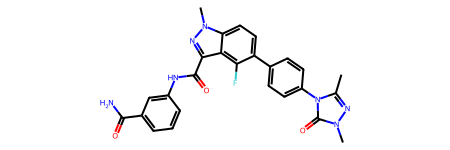

In [4]:
compound_id_1 = 'KT-0199164'
table_frag_c1 = table_frag[table_frag['title']==compound_id_1].reset_index(drop=True)
table_frag_c1.rename(columns={'id_x':'rec_id', 'id_y':'frag_id'}, inplace=True)
table_frag_c1.to_csv(f'./results/{compound_id_1}.csv', index=False)
print(table_frag_c1.shape)
mol_1 = Chem.MolFromSmiles(table_frag_c1['input_smiles'][0])
mol_1

(68, 17)


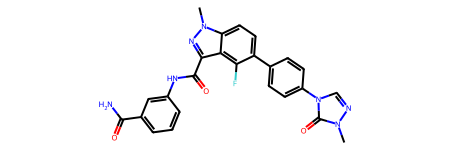

In [5]:
compound_id_2 = 'KT-0199156'
table_frag_c2 = table_frag[table_frag['title']==compound_id_2].reset_index(drop=True)
table_frag_c2.rename(columns={'id_x':'rec_id', 'id_y':'frag_id'}, inplace=True)
table_frag_c2.to_csv(f'./results/{compound_id_2}.csv', index=False)
print(table_frag_c2.shape)
mol_2 = Chem.MolFromSmiles(table_frag_c2['input_smiles'][0])
mol_2

(2, 17)


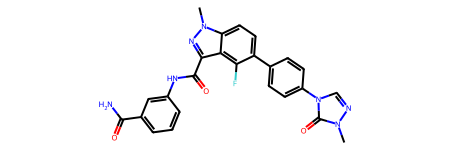

In [14]:
compound_id_3 = 'KT-0000559'
table_frag_c3 = table_frag[table_frag['title']==compound_id_3].reset_index(drop=True)
table_frag_c3.rename(columns={'id_x':'rec_id', 'id_y':'frag_id'}, inplace=True)
table_frag_c3.to_csv(f'./results/{compound_id_3}.csv', index=False)
print(table_frag_c3.shape)
mol_3 = Chem.MolFromSmiles(table_frag_c2['input_smiles'][0])
mol_3

In [6]:
constant_smarts_1 = '[*:1]C.[*:2]c1ccc(-c2ccc3c(c(C(=O)Nc4cccc(C(N)=O)c4)nn3C)c2F)cc1'
constant_smarts_2 = '[*:1]c1ccc(-c2ccc3c(c(C(=O)Nc4cccc(C(N)=O)c4)nn3C)c2F)cc1'

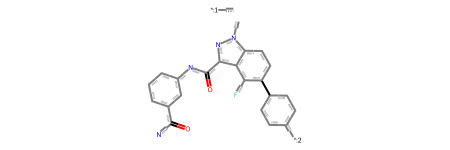

In [10]:
Chem.MolFromSmarts(constant_smarts_1)

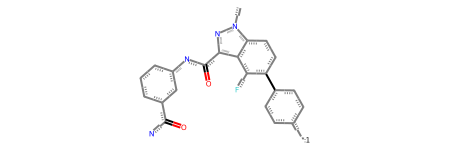

In [11]:
Chem.MolFromSmarts(constant_smarts_2)

In [7]:
def view_constant(m1, m2, constant_smarts, figsize=(350,300)):

    ## align 2 mols
    constant_smarts_main = sorted(constant_smarts.split('.'), key=len, reverse=True)[0]
    constant_main = Chem.MolFromSmarts(constant_smarts_main)

    AllChem.Compute2DCoords(constant_main)
    AllChem.GenerateDepictionMatching2DStructure(m1, constant_main)
    AllChem.GenerateDepictionMatching2DStructure(m2, constant_main)

    ## find matched atoms
    constant = Chem.MolFromSmarts(constant_smarts)
    match_m1 = m1.GetSubstructMatch(constant)
    match_m2 = m2.GetSubstructMatch(constant)

    match_a_m1 = [x for x in match_m1]
    match_a_m2 = [x for x in match_m2]

    return Draw.MolsToGridImage([m1, m2], subImgSize=figsize, highlightAtomLists=[match_a_m1, match_a_m2])

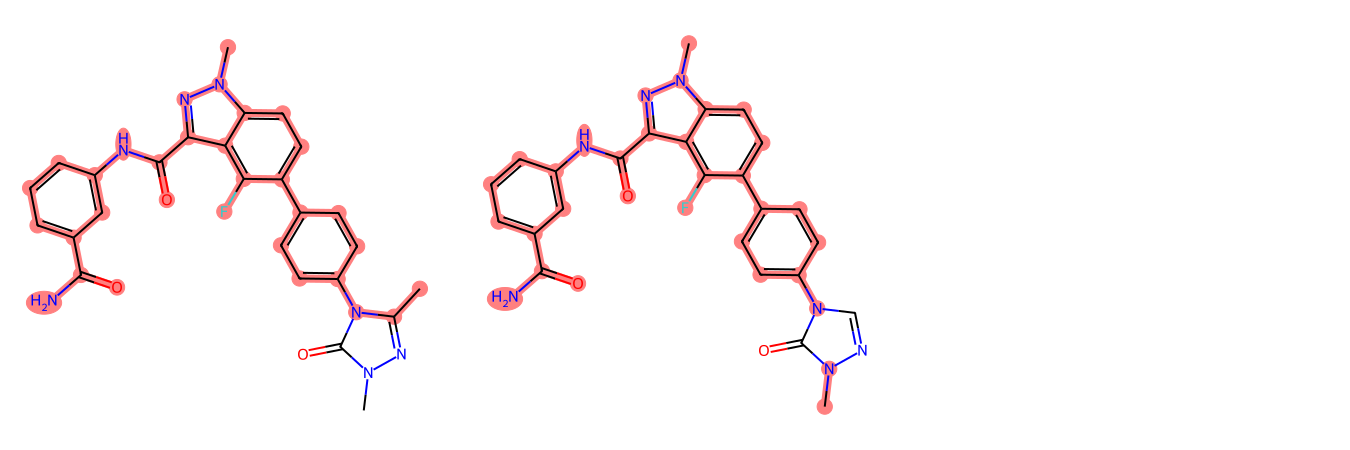

In [8]:
view_constant(mol_1, mol_2, constant_smarts_1, figsize=(450, 450))

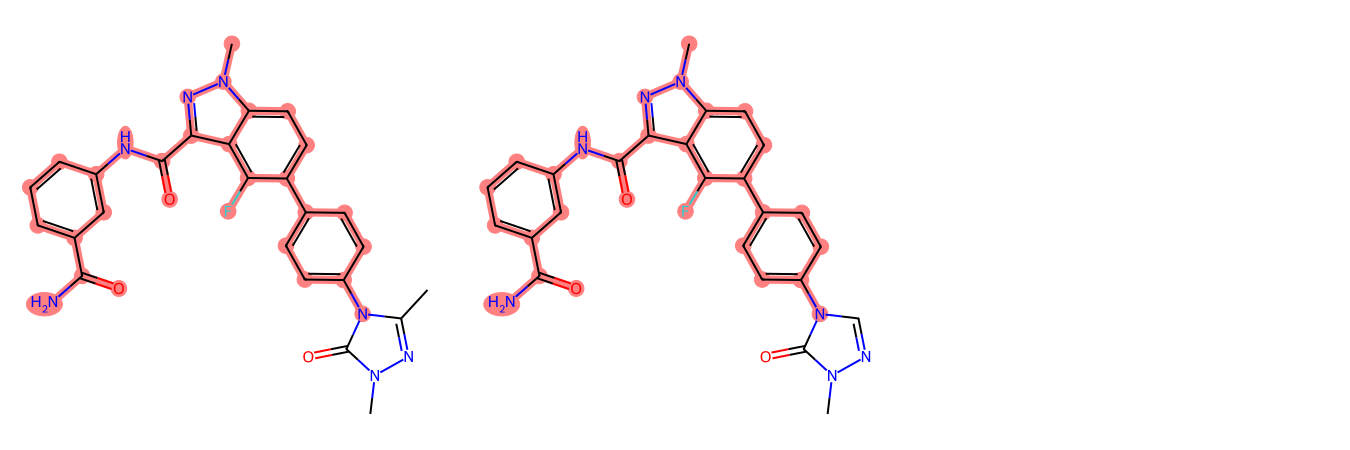

In [9]:
view_constant(mol_1, mol_2, constant_smarts_2, figsize=(450, 450))

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

def view_constant(m1, m2, constant, figsize=(350,300)):
    match_m1 = m1.GetSubstructMatch(constant)
    match_m2 = m2.GetSubstructMatch(constant)

    # match_a_m1 = []
    # for atom in m1.GetAtoms():
    #     atom_idx = atom.GetIdx()
    #     if atom_idx not in match_m1:
    #         match_a_m1.append(atom_idx)
    match_a_m1 = [x for x in match_m1]

    # match_a_m2 = []
    # for atom in m2.GetAtoms():
    #     atom_idx = atom.GetIdx()
    #     if atom_idx not in match_m2:
    #         match_a_m2.append(atom_idx)
    match_a_m2 = [x for x in match_m2]

    return Draw.MolsToGridImage([m1, m2], subImgSize=(350,300), highlightAtomLists=[match_a_m1, match_a_m2])

#### m1 ==> m2

In [ ]:
m1 = Chem.MolFromSmiles('n1(c3c(c(c1C#CCNC(=O)OC(C)(C)C)/C=C/2\CC(OC2=O)(COC(=O)C(C)(C)C)CO)cccc3)C')
m2 = Chem.MolFromSmiles('n1(c3c(c(c1)/C=C/2\CC(OC2=O)(COC(=O)C(C)(C)C)CO)cc(cc3)C#CCNC(=O)OC(C)(C)C)C')

In [ ]:
constant121 = Chem.MolFromSmarts('[*:1]/C=C1/CC(CO)(COC(=O)C(C)(C)C)OC1=O.[*:2]C#CCNC(=O)OC(C)(C)C')
view_constant(m1, m2, constant121)

In [ ]:
constant122 = Chem.MolFromSmarts('[*:1]/C=C1/CC(CO)(COC(=O)C(C)(C)C)OC1=O.[*:3]C.[*:2]C#CCNC(=O)OC(C)(C)C')
view_constant(m1, m2, constant122)

#### m4 ==> m5

In [ ]:
m4 = Chem.MolFromSmiles('Brc3c1n(c(cn1)N2CCC(=O)NC2=O)ccc3C')
m5 = Chem.MolFromSmiles('Brc3c(c1n(c(cn1)N2CCC(=O)NC2=O)cc3)C')

In [ ]:
constant451 = Chem.MolFromSmarts('[*:1]Br.[*:2]N1CCC(=O)NC1=O')
view_constant(m4, m5, constant451, figsize=(150, 150))

In [ ]:
constant541 = Chem.MolFromSmarts('[*:1]Br.[*:3]C.[*:2]N1CCC(=O)NC1=O')
view_constant(m5, m4, constant541, figsize=(150, 150))

In [ ]:
constant542 = Chem.MolFromSmarts('[*:1]C.[*:2]N1CCC(=O)NC1=O')
view_constant(m5, m4, constant542, figsize=(150, 150))